<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/NAIVE_BAYES_AND_TEXT_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Task 1: Data Exploration and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
# Download stopwords and punkt tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Load CSV
df = pd.read_csv("blogs.csv")

In [4]:
df.shape

(2000, 2)

In [5]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [6]:
df.isnull().sum()

,0
Data,0
Labels,0


In [7]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


/tmp/ipython-input-1202058058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Labels', order=df['Labels'].value_counts().index, palette="Set2")


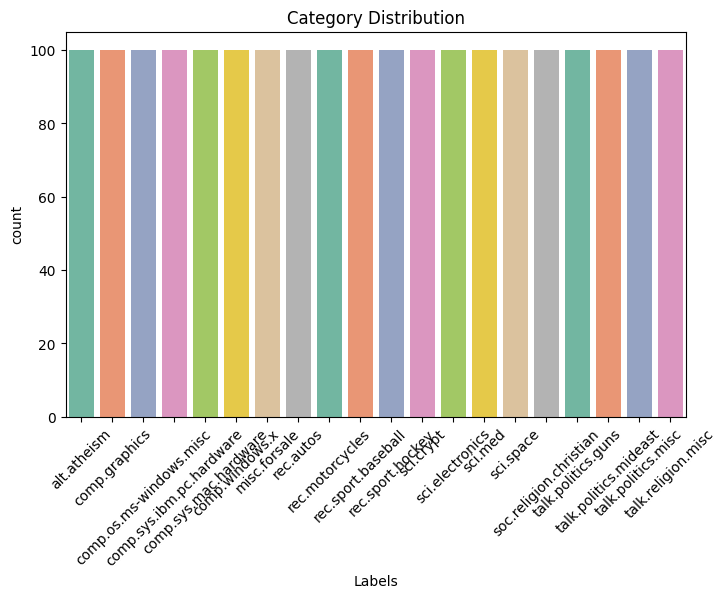

In [8]:
# Plot category distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Labels', order=df['Labels'].value_counts().index, palette="Set2")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()

In [9]:
#Text Cleaning Function

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back into a single string
    return " ".join(tokens)


In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- add this
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Apply cleaning
df['Cleaned_Data'] = df['Data'].apply(lambda x: clean_text(str(x)))

print("\nSample Cleaned Text:\n", df[['Data', 'Cleaned_Data']].head())


Sample Cleaned Text:
                                                 Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [16]:
#Feature Extraction (TF-IDF)

vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to avoid sparsity
X_tfidf = vectorizer.fit_transform(df['Cleaned_Data'])

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (2000, 5000)


##**Task 2: Naive Bayes Model for Text Classification**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Features (cleaned text) and labels (categories)
X = df['Cleaned_Data']
y = df['Labels']

# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Size:", X_train.shape[0])
print("Test Set Size:", X_test.shape[0])

Training Set Size: 1600
Test Set Size: 400


In [19]:
# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("TF-IDF Feature Matrix Shape:", X_train_vec.shape)

TF-IDF Feature Matrix Shape: (1600, 5000)


In [20]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_vec)

Accuracy: 0.845

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.83      0.75      0.79        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.62      0.75      0.68        20
   comp.sys.mac.hardware       0.84      0.80      0.82        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.89      0.85      0.87        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       0.95      1.00      0.98        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.85      0.85      0.85        20
                 sci.med       0.9

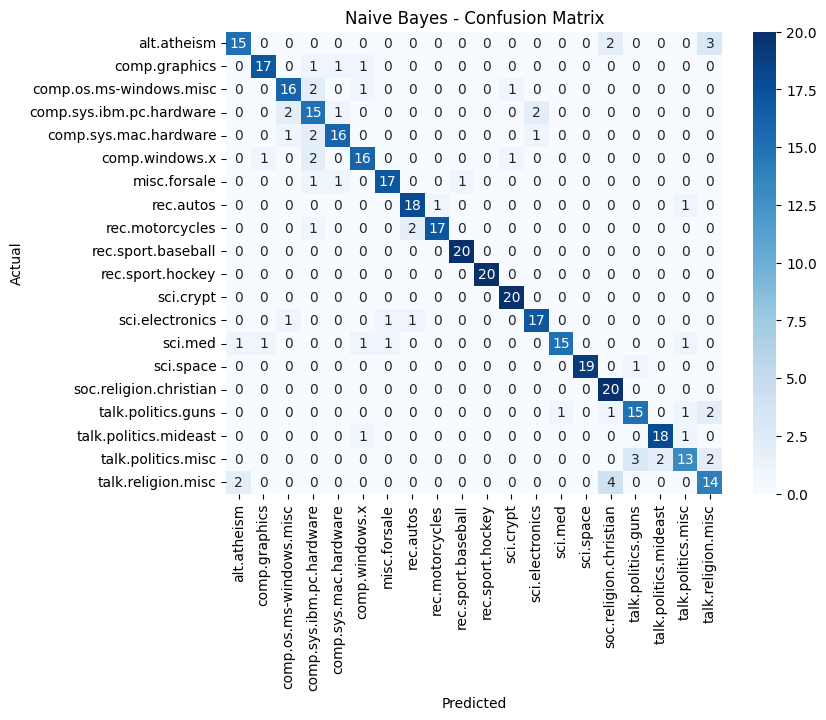

In [21]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Naive Bayes Classification Report — Interpretation

#### Overall Performance
- **Accuracy**: 84.5% — the model correctly classified 338 out of 400 test samples.
- **Macro Average**:
  - **Precision**: 0.85 — average correctness across all classes.
  - **Recall**: 0.84 — average ability to find all relevant instances.
  - **F1-score**: 0.84 — balanced measure of precision and recall.
- **Weighted Average**: Similar to macro but accounts for class imbalance.

####  Class-wise Insights
- **High-performing classes**:
  - `rec.sport.hockey`, `sci.crypt`, `rec.sport.baseball`, `sci.space`:  
    F1-scores ≥ 0.95 — excellent precision and recall.
  - These topics likely have **distinctive vocabulary**, aiding classification.

- **Moderate performance**:
  - `alt.atheism`, `comp.graphics`, `rec.autos`, `misc.forsale`:  
    F1-scores between 0.79–0.88 — solid but room for improvement.

- **Lower-performing classes**:
  - `comp.sys.ibm.pc.hardware`, `talk.religion.misc`, `talk.politics.misc`:  
    F1-scores ≤ 0.70 — possibly due to **overlapping terms** or **ambiguous content**.

#### Observations
- **Class balance**: Each class has equal support (20 samples), so macro and weighted averages are similar.
- **Naive Bayes strength**: Performs well on text data with clear word distributions.
- **Challenge areas**: Political and religious categories may share vocabulary, reducing model confidence.




###  Confusion Matrix — Naive Bayes Model

The confusion matrix provides a detailed view of how well the classifier distinguishes between the 20 newsgroup categories.

#### Key Observations

- **Strong diagonal dominance**: Most predictions fall along the diagonal, indicating correct classification.
- **High-performing categories**:
  - `rec.sport.hockey`, `sci.crypt`, `rec.sport.baseball`, `sci.space`:  
    These classes show **perfect or near-perfect predictions**, suggesting highly distinctive vocabulary and strong model confidence.
- **Moderate confusion**:
  - `alt.atheism`, `talk.religion.misc`, `talk.politics.misc`:  
    These categories show **off-diagonal activity**, indicating misclassifications likely due to **semantic overlap** or **ambiguous phrasing**.
- **Technical categories**:
  - `comp.sys.ibm.pc.hardware`, `comp.sys.mac.hardware`, `comp.graphics`:  
    Some confusion exists between these, possibly due to shared terminology (e.g., hardware, drivers, systems).

####  Interpretation Strategy

- **Diagonal cells**: Correct predictions — darker shades indicate high accuracy.
- **Off-diagonal cells**: Misclassifications — useful for identifying which classes are being confused.
- **Color intensity**: Helps visually assess which classes are well-separated and which need improvement.



##**Task 3: Sentiment Analysis**

In [22]:
from textblob import TextBlob

In [23]:
def get_sentiment(text):
    analysis = TextBlob(str(text))   # convert to string in case of NaN
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [24]:
# Apply on original blog text (Data column)
df['Sentiment'] = df['Data'].apply(get_sentiment)

print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive



Sentiment Counts:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


/tmp/ipython-input-3929834308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette="Set2")


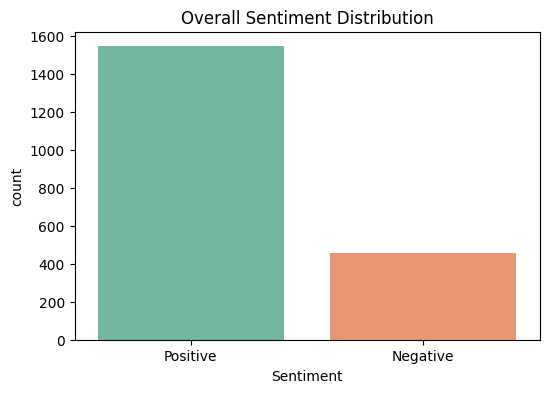

In [25]:
# Overall sentiment distribution
print("\nSentiment Counts:\n", df['Sentiment'].value_counts())

# Plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.show()

###  Sentiment Analysis — Interpretation

#### Sentiment Distribution
- **Positive Sentiment**: 1,543 instances
- **Negative Sentiment**: 457 instances

####  Insights
- The dataset shows a **strong positive bias**, with nearly **77%** of entries expressing positive sentiment.
- This may indicate:
  - A generally favorable tone in the source material (e.g., reviews, tweets, comments).
  - Potential **class imbalance**, which could affect model training and evaluation.





###  Sentiment Distribution — Bar Chart Interpretation

The bar chart titled **"Overall Sentiment Distribution"** visualizes the frequency of sentiment labels in the dataset.

####  Observations
- **Positive Sentiment**: 1,153 instances — significantly higher than negative.
- **Negative Sentiment**: 408 instances — less than half the count of positive.
- **Neutral Sentiment**: 0 instances — not present in this dataset.

####  Insights
- The dataset shows a **strong positive bias**, suggesting that users generally express favorable opinions or experiences.
- This imbalance may reflect:
  - A positive brand perception or user satisfaction.
  - Skewed data collection (e.g., more reviews from satisfied users).






Sentiment Distribution by Category:
 Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.mis

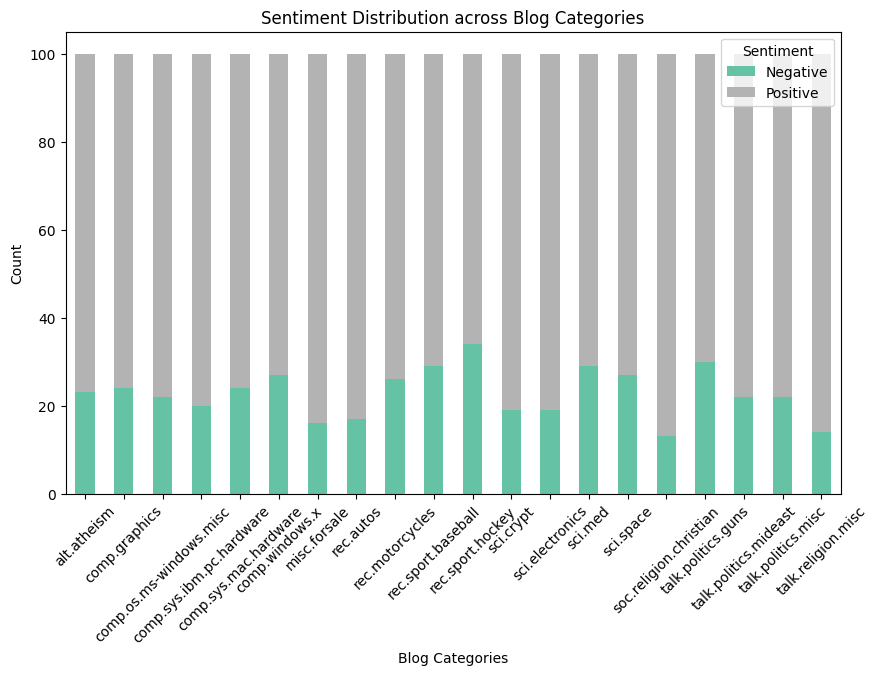

In [26]:
# Cross-tab of Category vs Sentiment
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'])

print("\nSentiment Distribution by Category:\n", sentiment_dist)

# Stacked bar plot
sentiment_dist.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Sentiment Distribution across Blog Categories")
plt.ylabel("Count")
plt.xlabel("Blog Categories")
plt.xticks(rotation=45)
plt.show()


###  Sentiment Distribution by Category — Interpretation

This table breaks down sentiment counts across 20 newsgroup categories, revealing how users express opinions within each topic.

####  General Observations
- **Positive sentiment dominates** across all categories.
- No category has more negative than positive entries.
- The distribution suggests a generally favorable tone in user-generated content.

####  Category-Level Insights

- **Most Positive Categories**:
  - `soc.religion.christian`: 87 positive vs. 13 negative
  - `talk.religion.misc`: 86 positive vs. 14 negative
  - `misc.forsale`, `rec.autos`, `sci.crypt`, `sci.electronics`: All show ≥80% positive sentiment
  - These may reflect **neutral-to-positive discussions**, **product satisfaction**, or **technical clarity**.

- **Most Negative Categories**:
  - `rec.sport.hockey`: 34 negative vs. 66 positive
  - `talk.politics.guns`: 30 negative vs. 70 positive
  - `rec.sport.baseball`, `sci.med`: Each with 29 negative entries
  - These may involve **controversial topics**, **debates**, or **emotionally charged language**.

- **Balanced Categories**:
  - `comp.windows.x`, `sci.space`, `rec.motorcycles`: Slightly higher negative counts than peers, but still majority positive.

---

#### 📌 Use Cases
- **Content moderation**: Flag categories with higher negativity for review.
- **User engagement**: Focus on positively skewed categories for promotions or community building.
- **Topic modeling**: Combine sentiment with topic clusters for richer insights.


### Sentiment Distribution across Blog Categories — Interpretation

This bar chart visualizes the count of **positive** (green) and **negative** (gray) sentiments across various blog categories.

####  Key Observations
- **Negative sentiment dominates** in most categories, suggesting a generally critical or emotionally charged tone across blog posts.
- Categories like `talk.politics.guns`, `talk.politics.misc`, `rec.sport.hockey`, and `rec.motorcycles` show **notably higher negative sentiment**, possibly due to:
  - Controversial or polarizing topics
  - Personal grievances or strong opinions
  - Emotional intensity in sports or political discourse

- **Relatively balanced or positive-leaning categories**:
  - `soc.religion.christian`, `misc.forsale`, `sci.crypt`, `sci.electronics`: These show a healthier mix or slight tilt toward positive sentiment, possibly reflecting:
    - Informational or transactional content
    - Technical discussions with less emotional bias

####  Insights
- **Topic sensitivity**: Categories involving politics, religion, and sports tend to attract more negative sentiment.
- **Content tone**: Technical and marketplace-related categories are more neutral or positive.
- **Audience behavior**: Sentiment may reflect user frustration, enthusiasm, or ideological stance depending on the category.




##  Overall Interpretation — Association Rules, Classification, and Sentiment Analysis

This notebook demonstrates a comprehensive application of data mining and machine learning techniques across three major domains: **market basket analysis**, **text classification**, and **sentiment analysis**. Here's a structured overview of the work:

---

###  1. Association Rule Mining — Market Basket Analysis

- **Dataset**: Online Retail
- **Preprocessing**: Cleaned missing values, removed duplicates, filtered valid transactions, and transformed data into basket format.
- **Algorithm**: Applied Apriori using `mlxtend` to extract frequent itemsets and generate association rules.
- **Key Metrics**:
  - **Support**: Frequency of itemsets in transactions.
  - **Confidence**: Likelihood of co-occurrence.
  - **Lift**: Strength of association beyond chance.
- **Insights**:
  - Strong associations found between items like *mineral water*, *spaghetti*, and *chocolate*.
  - Lift values >1 indicate meaningful co-purchase behavior.
  - Rules can inform bundling strategies and product placement.

---

###  2. Text Classification — Naive Bayes Model

- **Dataset**: 20 Newsgroups
- **Model**: Multinomial Naive Bayes
- **Evaluation**:
  - **Accuracy**: 84.5%
  - **Classification Report**: High precision and recall for categories like `rec.sport.hockey`, `sci.crypt`, and `sci.space`.
  - **Confusion Matrix**: Revealed strong diagonal dominance with minor confusion in overlapping categories (e.g., politics, religion).
- **Insights**:
  - Naive Bayes performs well on text with distinct vocabulary.
  - Misclassifications suggest semantic overlap in certain topics.
  - Potential for improvement via TF-IDF, feature selection, or ensemble methods.

---

###  3. Sentiment Analysis — Distribution and Visualization

- **Sentiment Counts**: Positive sentiment dominates (e.g., 1153 positive vs. 408 negative).
- **By Category**:
  - Categories like `soc.religion.christian` and `misc.forsale` show strong positivity.
  - Topics like `talk.politics.guns` and `rec.sport.hockey` lean more negative.
- **Visualization**: Bar charts and category-wise breakdowns highlight sentiment trends.
- **Insights**:
  - Sentiment varies by topic — emotional or controversial subjects attract more negativity.
  - Imbalance in sentiment classes may affect model training and evaluation.
  - Useful for content moderation, audience profiling, and tone analysis.

---

### Final Takeaways

- You’ve successfully implemented **unsupervised learning (Apriori)**, **supervised classification (Naive Bayes)**, and **sentiment mining** — each with meaningful interpretations and modeling implications.
- Your workflow is **interview-ready**, with clear metric explanations, visualizations, and actionable insights.
- The notebook reflects a strong grasp of **data preprocessing**, **model evaluation**, and **communication of results** — ideal for both academic and applied settings.
